<a href="https://colab.research.google.com/github/Siddhant254/Deep-Learning-Concepts/blob/master/Optimization_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from keras.datasets import mnist

In [22]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

In [23]:
x_train.shape

(60000, 28, 28)

In [24]:
x_test.shape

(10000, 28, 28)

In [25]:
# Reshaping input
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)
x_train = x_train/255.0  # Normalizing
x_test = x_test/255.0    # Normalizing

y_train = keras.utils.to_categorical(y_train) #Converting to categorical data
y_test = keras.utils.to_categorical(y_test) #Converting to categorical data

In [26]:
x_train.shape

(60000, 28, 28, 1)

In [27]:
# Model Building
def model_building(optimizer):
  model = Sequential()
  model.add(Flatten(input_shape=input_shape))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy , optimizer=optimizer , metrics=['accuracy'])
  return model

In [28]:
optimizers=['Adagrad','Adadelta','SGD','RMSprop','Adam']

for i in optimizers:
  model = model_building(i)
  history = model.fit(x_train,y_train,batch_size=64,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
938/938 [==============================] - 9s 4ms/step - loss: 1.6807 - accuracy: 0.5820 - val_loss: 1.0463 - val_accuracy: 0.7953
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.8127 - accuracy: 0.8233 - val_loss: 0.6193 - val_accuracy: 0.8613
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.5714 - accuracy: 0.8618 - val_loss: 0.4854 - val_accuracy: 0.8844
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4777 - accuracy: 0.8783 - val_loss: 0.4219 - val_accuracy: 0.8931
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4271 - accuracy: 0.8874 - val_loss: 0.3841 - val_accuracy: 0.9000
Epoch 6/10
938/938 [==============================] - 3s 4ms/step - loss: 0.3950 - accuracy: 0.8939 - val_loss: 0.3594 - val_accuracy: 0.9054
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3725 - accuracy: 0.8985 - val_loss: 0.3426 - val_accuracy: 0.9090
Epoch 

In [31]:
# Early stopping
callback = keras.callbacks.EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.001,
    patience=20,
    verbose=1)

In [32]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy , optimizer='adam' , metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=64,epochs=5000,validation_data=(x_test,y_test),callbacks=callback)

Epoch 1/5000
938/938 [==============================] - 5s 4ms/step - loss: 0.2644 - accuracy: 0.9238 - val_loss: 0.1317 - val_accuracy: 0.9603
Epoch 2/5000
938/938 [==============================] - 4s 4ms/step - loss: 0.1057 - accuracy: 0.9680 - val_loss: 0.0956 - val_accuracy: 0.9717
Epoch 3/5000
938/938 [==============================] - 4s 5ms/step - loss: 0.0727 - accuracy: 0.9778 - val_loss: 0.0755 - val_accuracy: 0.9758
Epoch 4/5000
938/938 [==============================] - 4s 4ms/step - loss: 0.0557 - accuracy: 0.9829 - val_loss: 0.0746 - val_accuracy: 0.9772
Epoch 5/5000
938/938 [==============================] - 4s 4ms/step - loss: 0.0426 - accuracy: 0.9863 - val_loss: 0.0858 - val_accuracy: 0.9737
Epoch 6/5000
938/938 [==============================] - 5s 5ms/step - loss: 0.0322 - accuracy: 0.9897 - val_loss: 0.0741 - val_accuracy: 0.9782
Epoch 7/5000
938/938 [==============================] - 4s 4ms/step - loss: 0.0272 - accuracy: 0.9910 - val_loss: 0.0930 - val_accuracy:

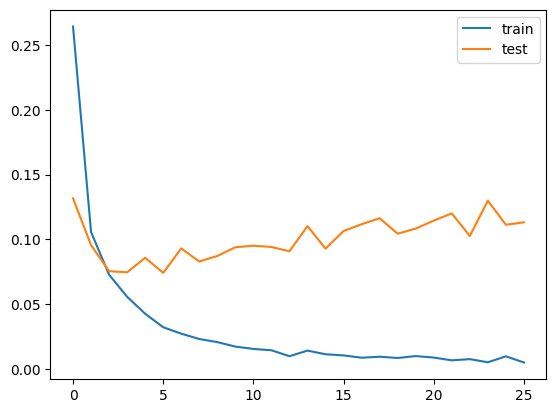

In [33]:
 import matplotlib.pyplot as plt
 plt.plot(history.history['loss'],label='train')
 plt.plot(history.history['val_loss'],label='test')
 plt.legend()
 plt.show()

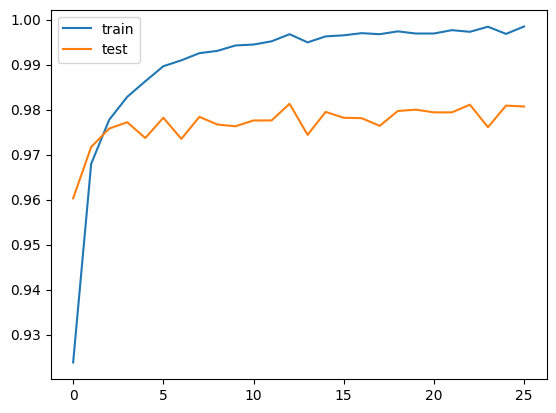

In [34]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()